In [1]:
import pandas as pd
import numpy as np

# Load the data from the CSV file
data = pd.read_csv('data.csv')

# Check the first few rows of the data
display(data.head())

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
# List of features and target column
features = ['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer']
target = 'gdpp'

# Separate the features (X) and the target (y)
X = data[features]
y = data[target]

# Handle missing values: Drop rows with missing values (or impute if needed)
X = X.dropna()
y = y[X.index]  # Ensure target values correspond to rows in X

# Convert categorical features like 'country' to numeric (using category codes)
X['country'] = X['country'].astype('category').cat.codes

In [3]:
# Normalize the features using StandardScaler manually
def normalize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

# Normalize the features
X_normalized = normalize_data(X)
display(X_normalized.head())
# Split the data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(X_normalized))
X_train, X_test = X_normalized[:train_size], X_normalized[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,-1.721710,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-1.700967,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-1.680223,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,-1.659480,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-1.638736,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


In [4]:
# Function to compute Euclidean distance between two data points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to predict the target value (gdpp) using KNN
def knn_predict(X_train, y_train, X_test, k=5):
    predictions = []
    
    for test_point in X_test:
        # Calculate distances from the test point to all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        
        # Sort distances and get indices of the K nearest neighbors
        k_indices = np.argsort(distances)[:k]
        
        # Get the target values of the K nearest neighbors
        k_nearest_targets = y_train.iloc[k_indices]
        
        # Predict the target value by averaging the K nearest neighbors' target values
        predictions.append(np.mean(k_nearest_targets))
    
    return np.array(predictions)

# Predict the target values (gdpp) for the test set using KNN
k = 5
y_pred = knn_predict(X_train.values, y_train, X_test.values, k)
# Evaluate the model
mse = np.mean((y_pred - y_test.values) ** 2)
r2 = 1 - (np.sum((y_test.values - y_pred) ** 2) / np.sum((y_test.values - np.mean(y_test.values)) ** 2))

print(f"R² Score: {r2}")

R² Score: 0.8661349594015042


C:\Users\sriram\AppData\Local\Temp\ipykernel_14664\541774028.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


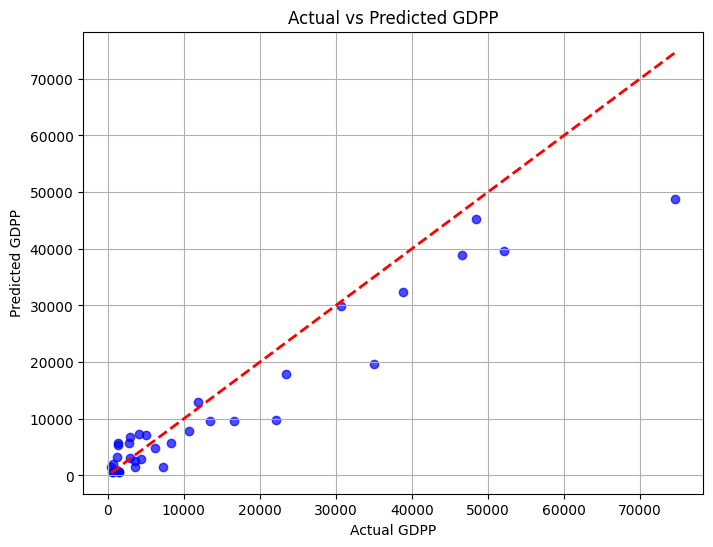

In [5]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Actual vs Predicted GDPP')
plt.xlabel('Actual GDPP')
plt.ylabel('Predicted GDPP')
plt.grid(True)
plt.show()